#### PATIENT INFORMATION

The Admissions table gives us some interesting insights regarding the hospital patients in the database.

Let us start by importing the libraries we will need to perform the Exploratory Data Analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')


In [4]:
admissions_df = pd.read_csv('..\Extracted CSVs\ADMISSIONS.csv')

The next few lines of code give us more insight about the type of data and null values if any are present.

In [5]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [6]:
admissions_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [7]:
admissions_df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


This doesn't tell us much as the information in the dataset in more qualitative in nature.

In [8]:
admissions_df.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

The EDREGTIME and EDOUTTIME columns tell us the time that the patient was registered and discharged from the emergency department.


The DIAGNOSIS column provides a preliminary, free text diagnosis for the patient on hospital admission. The diagnosis is usually assigned by the admitting clinician and does not use a systematic ontology. 

In [9]:
admissions_df['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

According to the documentation: <br>
    ADMISSION_TYPE describes the type of the admission: ‘ELECTIVE’, ‘URGENT’, ‘NEWBORN’ or ‘EMERGENCY’. Emergency/urgent indicate unplanned medical care, and are often collapsed into a single category in studies. Elective indicates a previously planned hospital admission. Newborn indicates that the HADM_ID pertains to the patient’s birth.

([<matplotlib.patches.Wedge at 0x16d8b3ed490>,
 [Text(-0.6833293191907592, 0.8620098848240046, 'EMERGENCY'),
  Text(0.20625997086614958, -1.0804891597874988, 'NEWBORN'),
  Text(0.936148636949596, -0.5776034362236894, 'ELECTIVE'),
  Text(1.097215545258922, -0.07821794705926709, 'URGENT')])

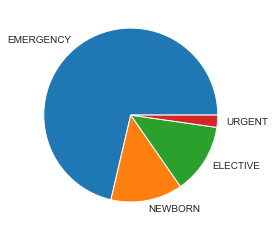

In [10]:
plt.pie(admissions_df['ADMISSION_TYPE'].value_counts(), labels = 'EMERGENCY NEWBORN ELECTIVE URGENT'.split())

The above pie chart shows us the distribution of the types of admissions. 

In [11]:
admissions_df['ETHNICITY'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

In [13]:
admissions_df['ETHNICITY'].value_counts().head(10)

WHITE                             40996
BLACK/AFRICAN AMERICAN             5440
UNKNOWN/NOT SPECIFIED              4523
HISPANIC OR LATINO                 1696
OTHER                              1512
ASIAN                              1509
UNABLE TO OBTAIN                    814
PATIENT DECLINED TO ANSWER          559
ASIAN - CHINESE                     277
HISPANIC/LATINO - PUERTO RICAN      232
Name: ETHNICITY, dtype: int64

The above code cell tells us the top 10 most common ethnicities that were admitted to the hospital.

<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

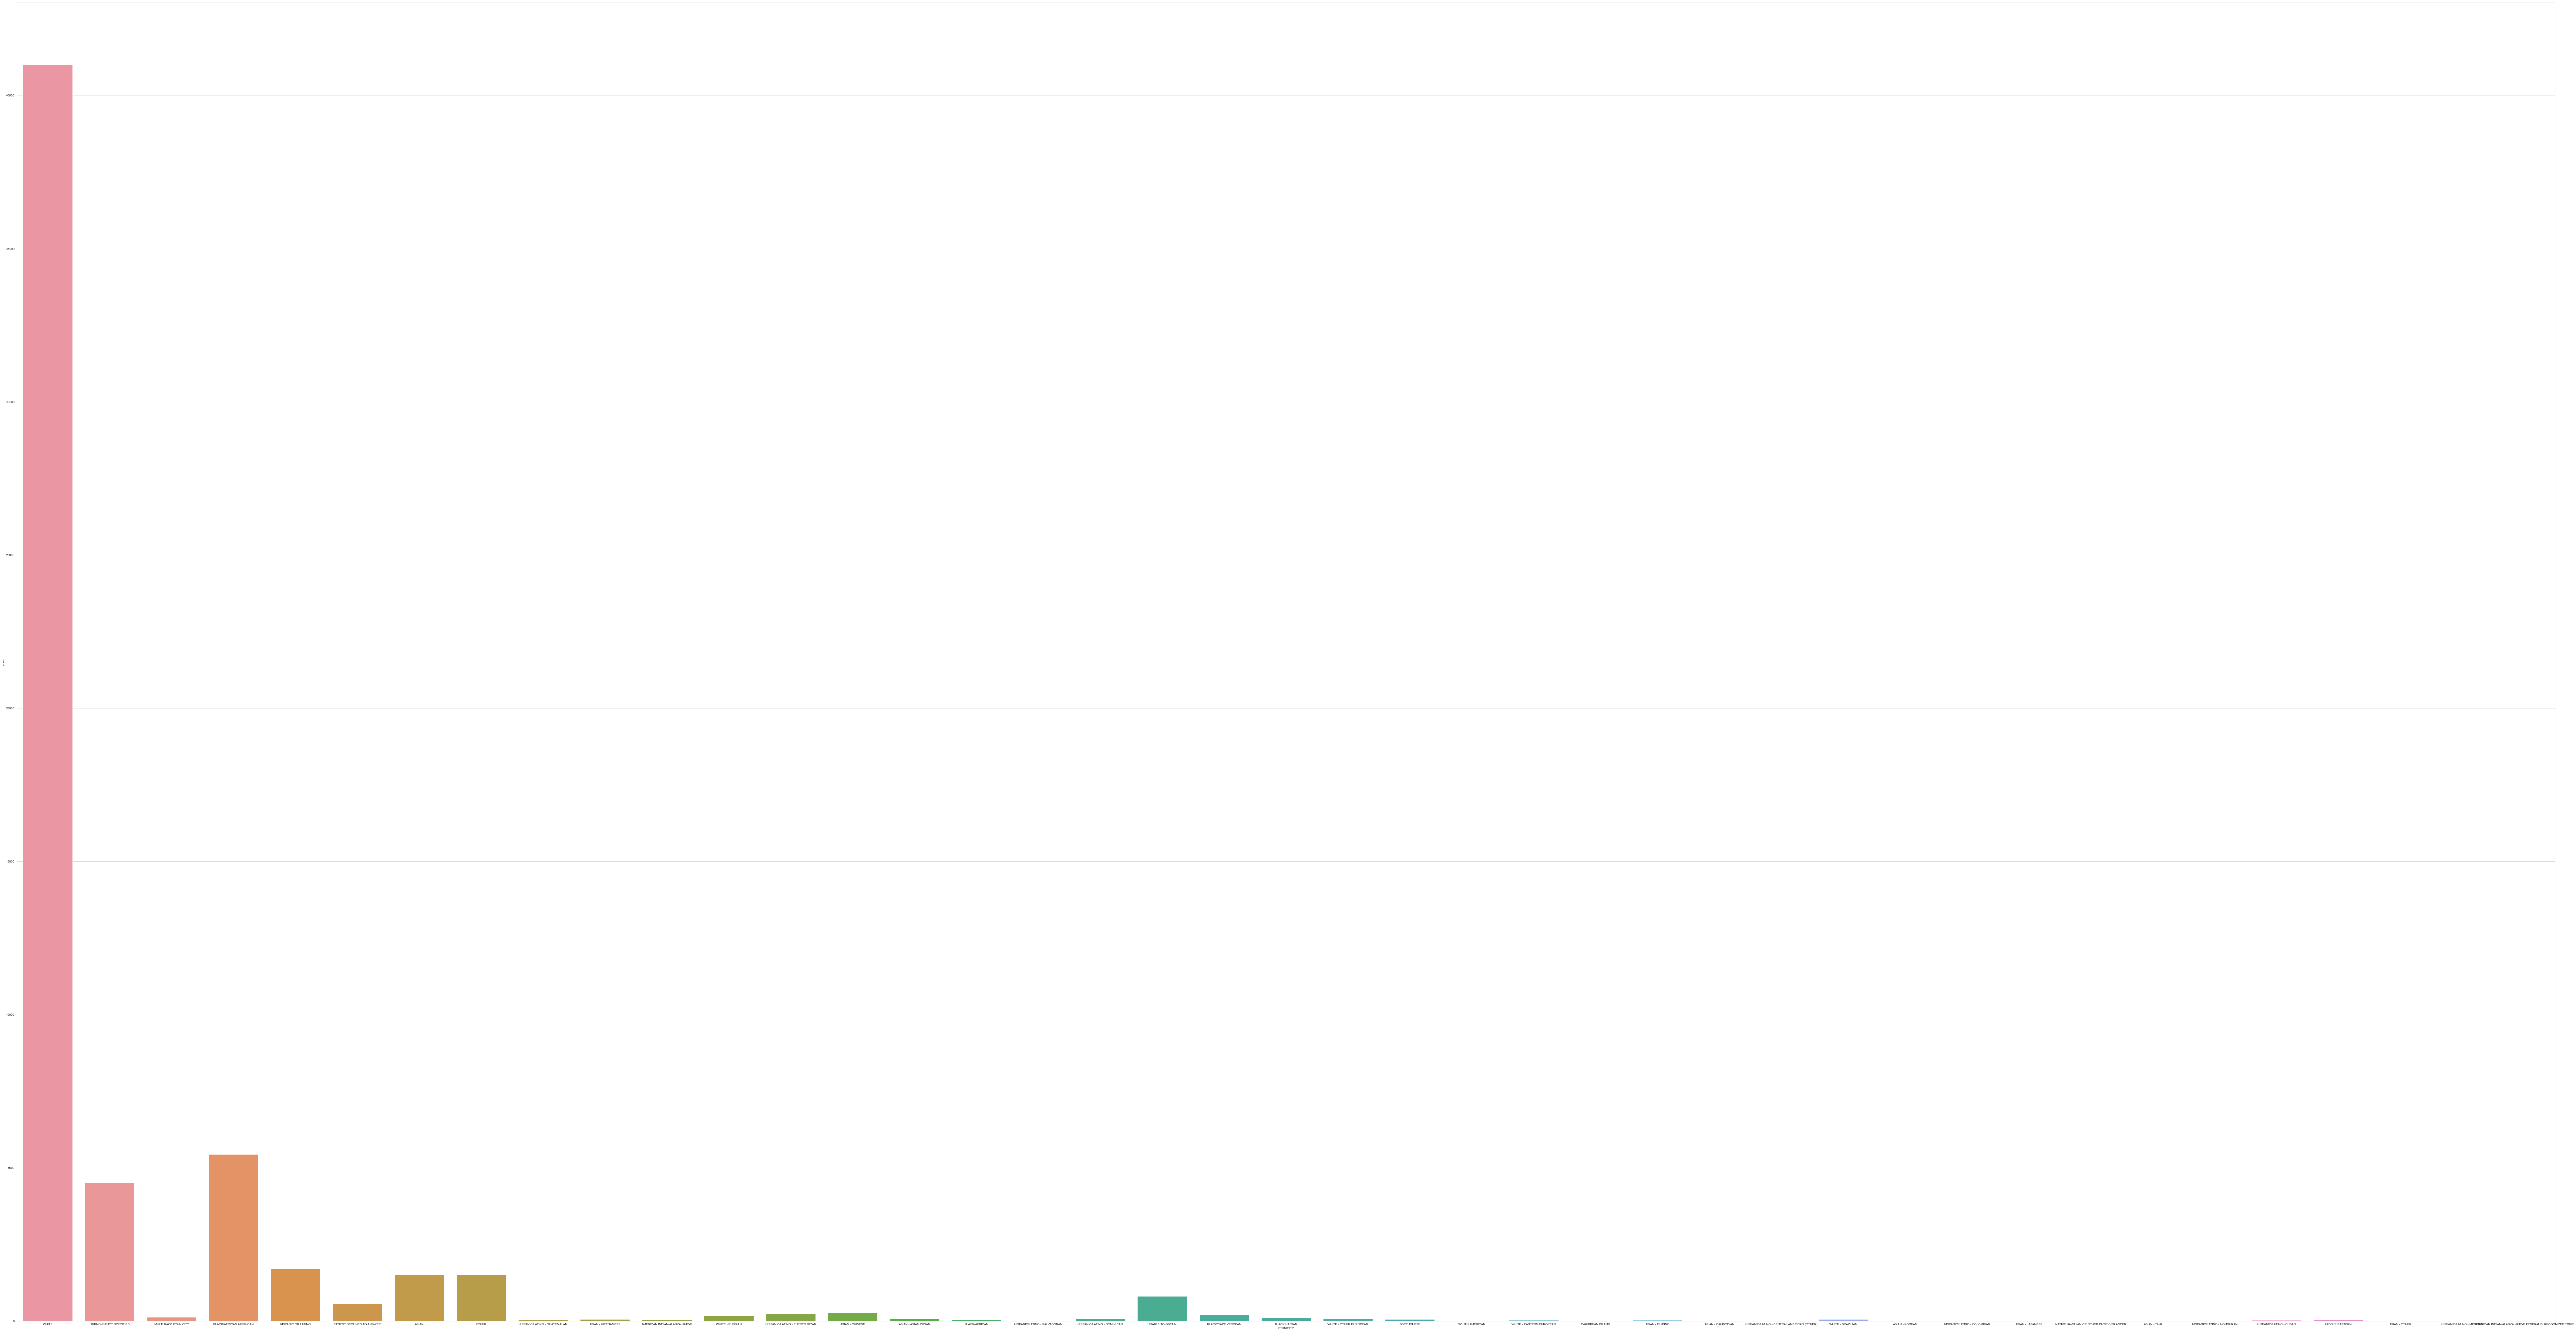

In [15]:
plt.figure(figsize=(150, 80))
sns.countplot(x = admissions_df['ETHNICITY'])

The above bar chart has a lot more values than we can compare at once. Let's compare the top 10 most common ethnicities.

<AxesSubplot:>

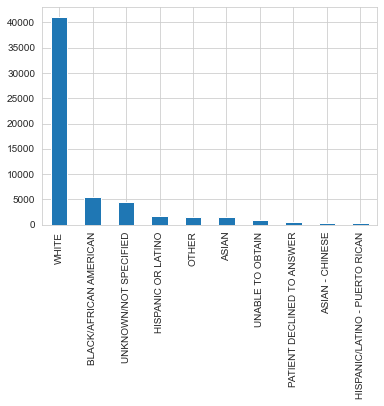

In [21]:
admissions_df['ETHNICITY'].value_counts().head(10).plot(kind='bar')

This is much easier to understand.

Let's compare the top 10 different languages spoken by the patients.

In [22]:
admissions_df['LANGUAGE'].value_counts().head(10)

ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
PORT      342
CAPE      256
MAND      156
HAIT      150
ITAL      124
Name: LANGUAGE, dtype: int64

<AxesSubplot:>

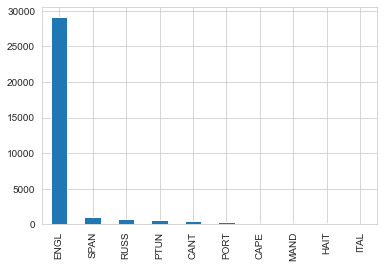

In [23]:
admissions_df['LANGUAGE'].value_counts().head(10).plot(kind='bar')

Let's compare the top 10 different religions with the help of a bar chart.

<AxesSubplot:>

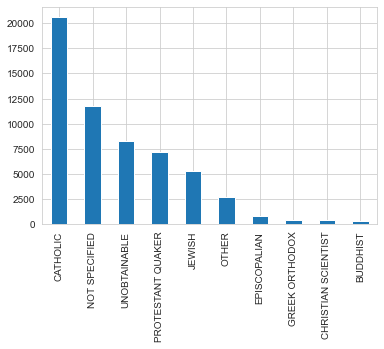

In [24]:
admissions_df['RELIGION'].value_counts().head(10).plot(kind='bar')

In the next few code cells, we check if there's a significant relationship between the deaths and the religion/ethnicity of the patients.

In [25]:
death_df = admissions_df[admissions_df['DEATHTIME'].notnull()]
death_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1
57,55,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,2104-01-08 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,NOT SPECIFIED,NaN,WHITE,2104-01-01 23:59:00,2104-01-02 03:33:00,HEAD BLEED,1,1
63,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1
70,68,67,155252,2157-12-02 00:45:00,2157-12-02 03:55:00,2157-12-02 03:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,SINGLE,WHITE,2157-12-01 20:45:00,2157-12-02 00:55:00,SUBARACHNOID HEMORRHAGE,1,1
88,86,84,166401,2196-04-14 04:02:00,2196-04-17 13:42:00,2196-04-17 13:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,OTHER,MARRIED,WHITE,2196-04-13 22:23:00,2196-04-14 04:31:00,"GLIOBLASTOMA,NAUSEA",1,1


The two charts below compare ethnicities and deaths.

<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

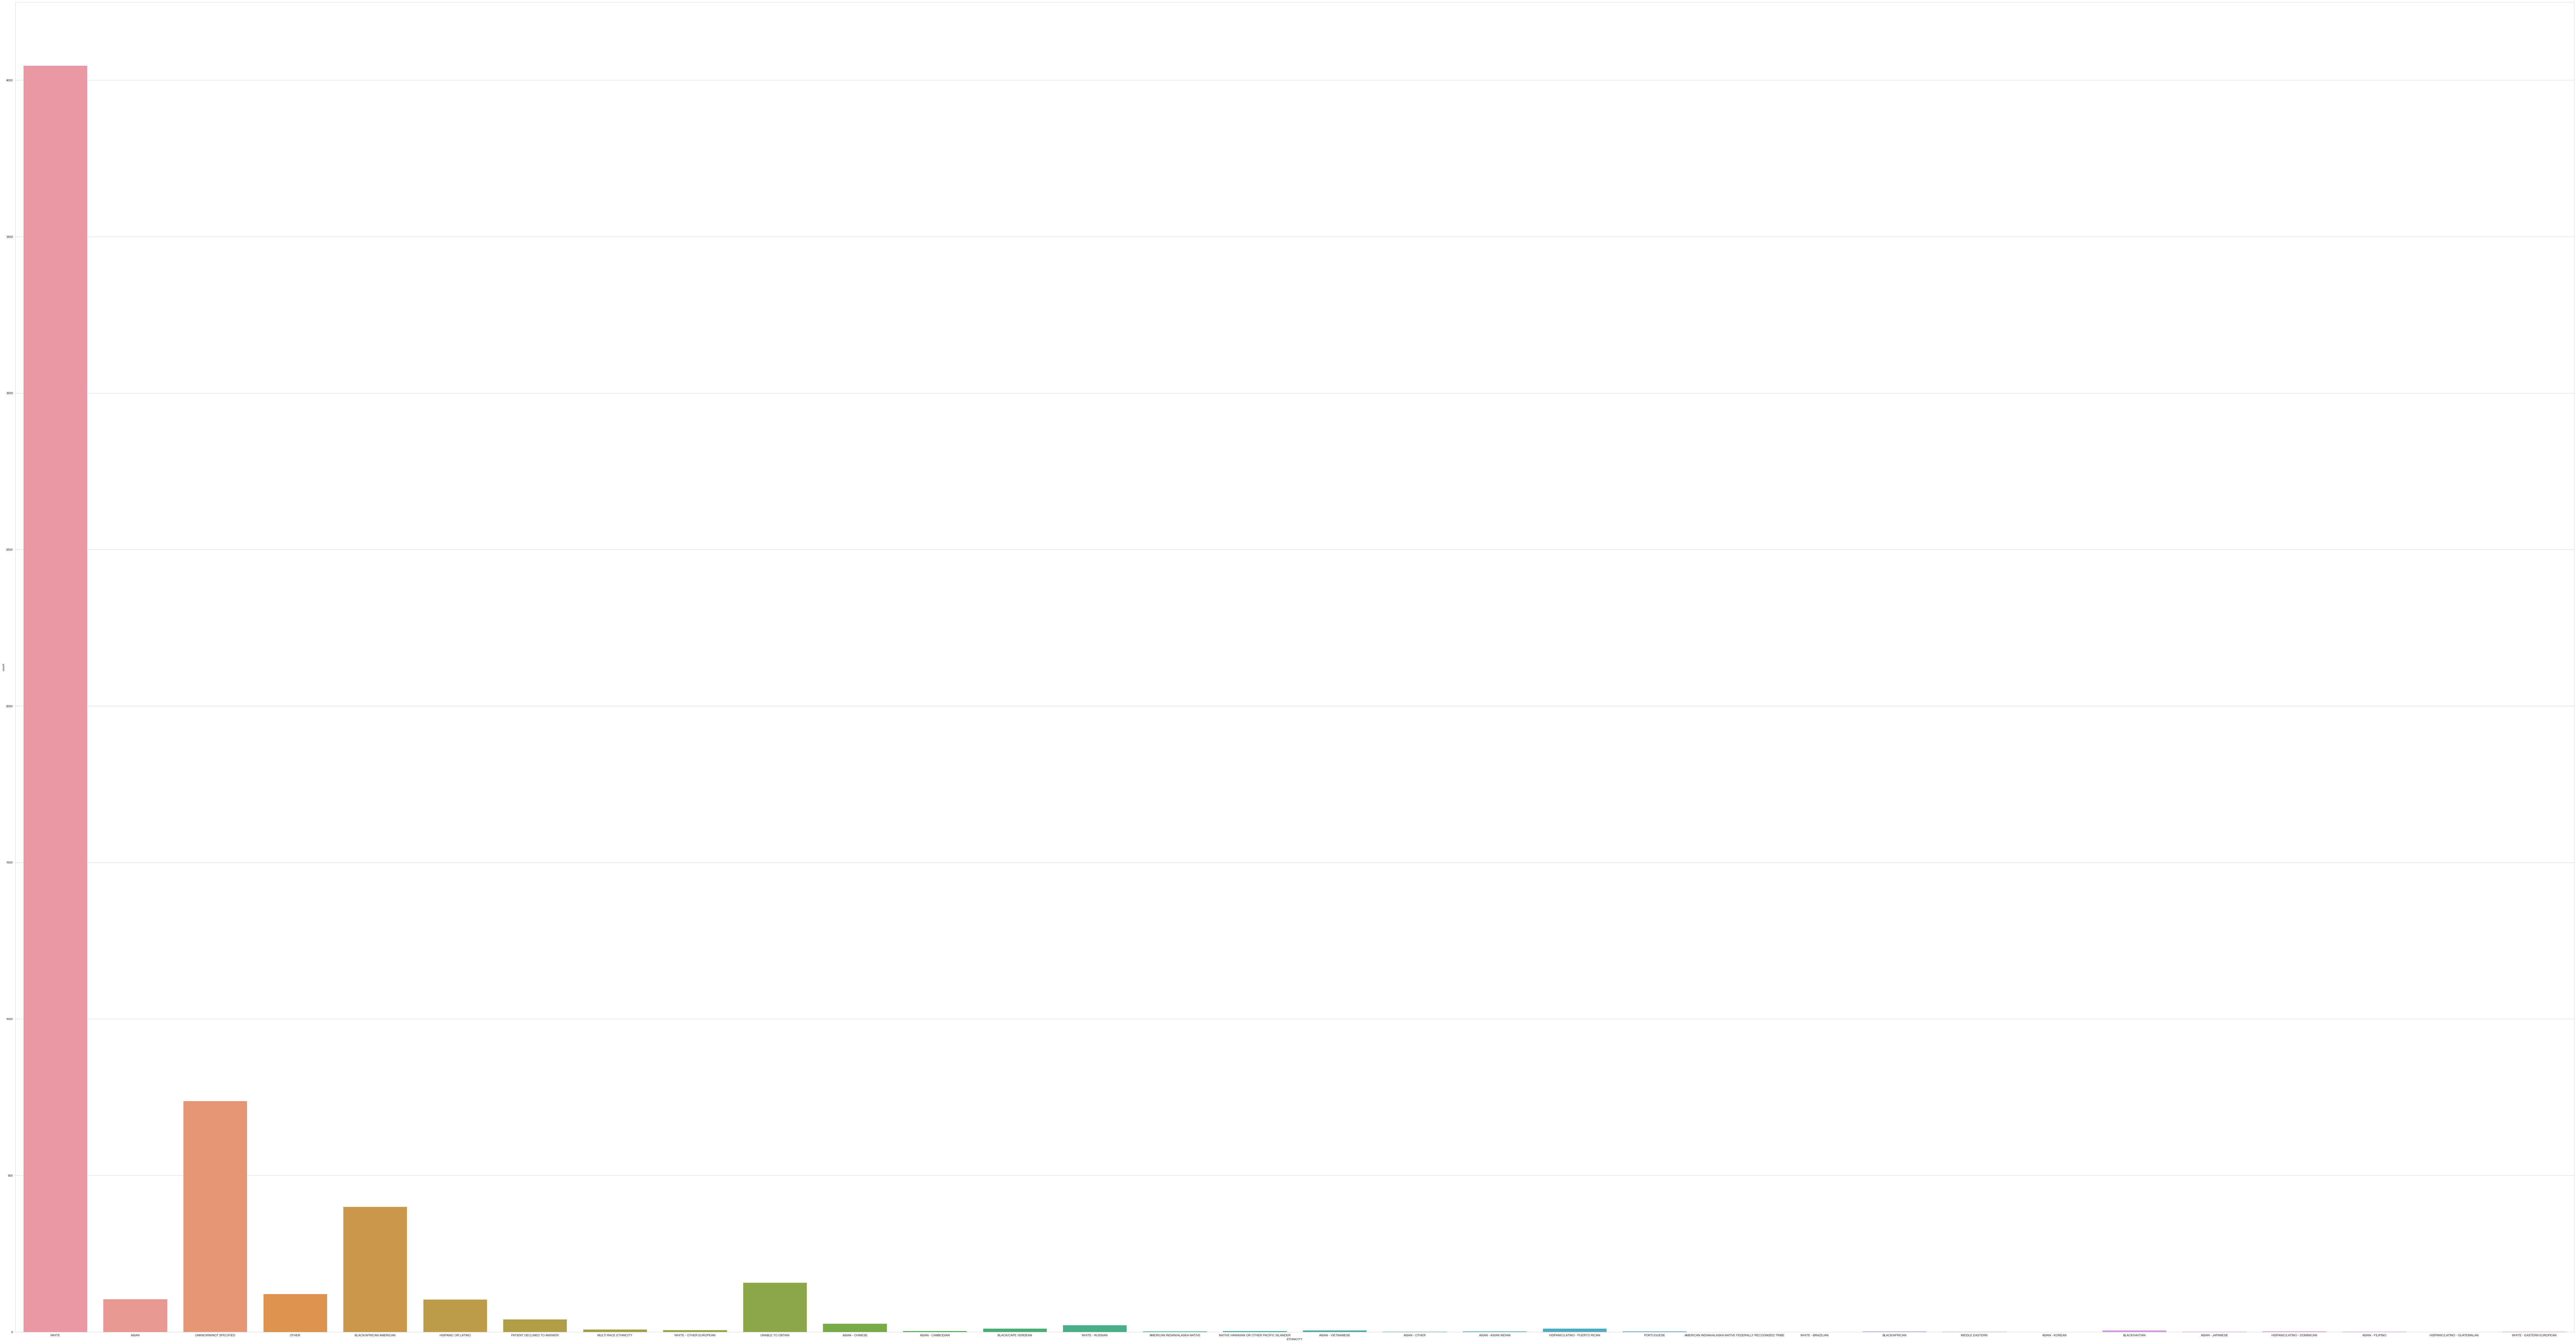

In [26]:
plt.figure(figsize=(150, 80))
sns.countplot(x = death_df['ETHNICITY'])

<AxesSubplot:>

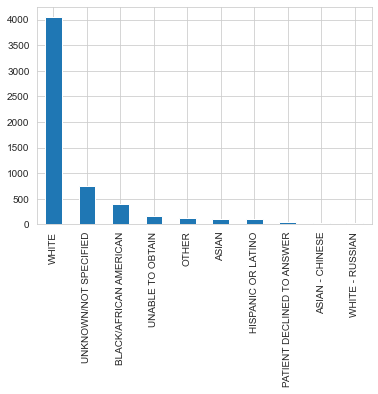

In [27]:
death_df['ETHNICITY'].value_counts().head(10).plot(kind='bar')

The two charts below compare religion followed and deaths.

<AxesSubplot:xlabel='RELIGION', ylabel='count'>

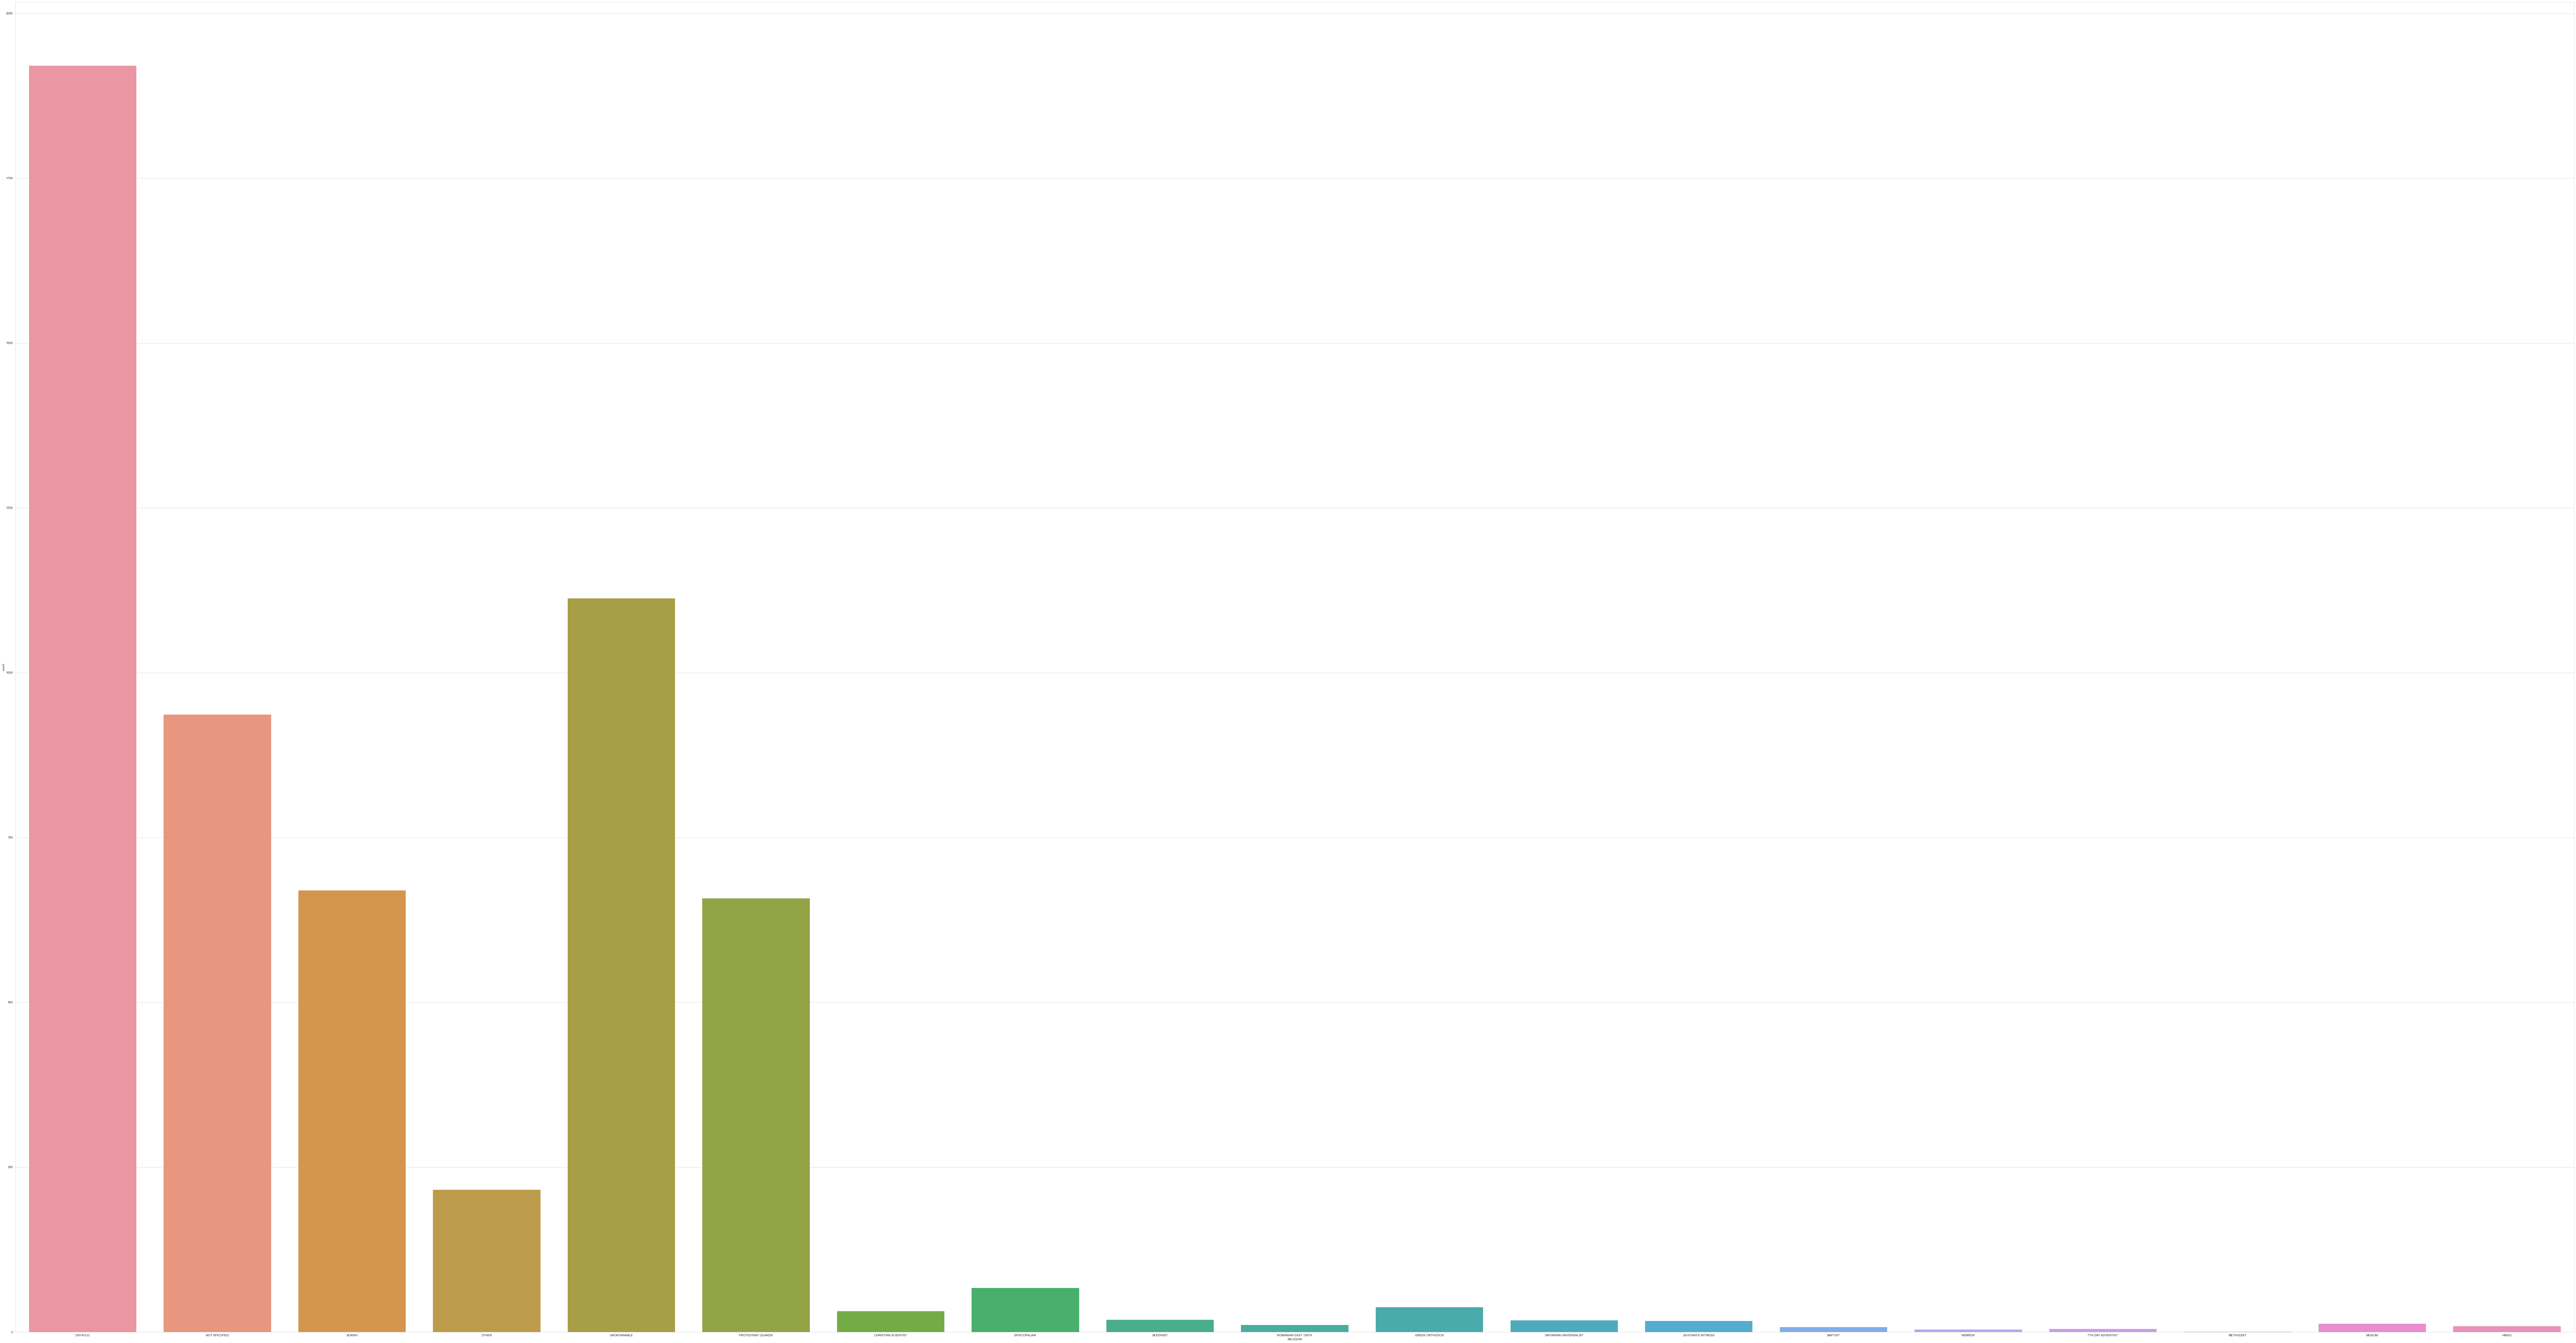

In [28]:
plt.figure(figsize=(150, 80))
sns.countplot(x = death_df['RELIGION'])

<AxesSubplot:>

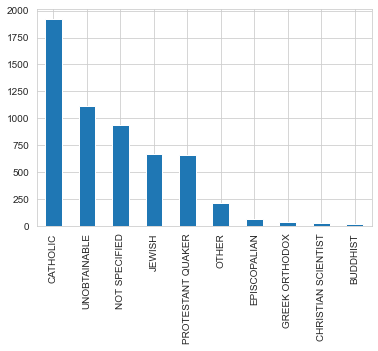

In [30]:
death_df['RELIGION'].value_counts().head(10).plot(kind='bar')

It's not that easy to notice with a simple countplot or bar chart of the number of deaths for each ethnicity/religion. Percentage would give us a better idea.

<AxesSubplot:>

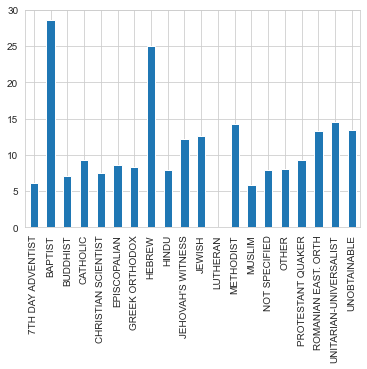

In [31]:
REL_Prop = (death_df['RELIGION'].value_counts()/admissions_df['RELIGION'].value_counts())*100
REL_Prop.plot(kind='bar')

<AxesSubplot:>

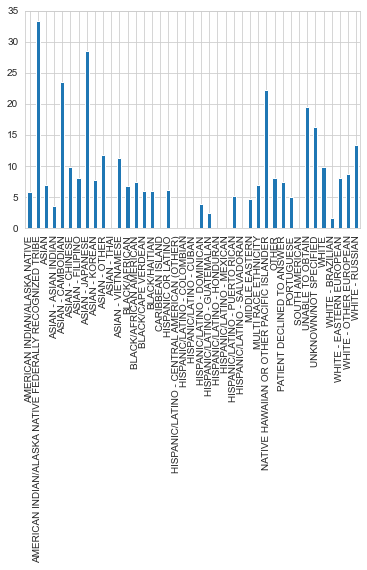

In [32]:
ETH_Prop = (death_df['ETHNICITY'].value_counts()/admissions_df['ETHNICITY'].value_counts())*100
ETH_Prop.plot(kind='bar')

The tables above tell us the proportion of the patients of a certain religion/ethnicity that died to the total number of patients of that religion/ethnicity that were admitted.

<AxesSubplot:>

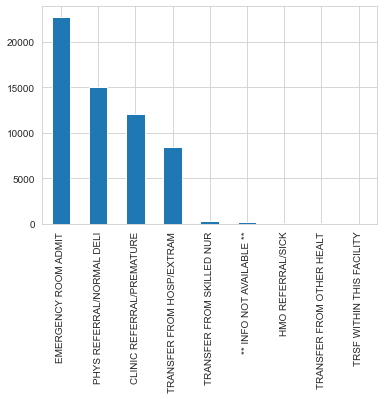

In [33]:
admissions_df['ADMISSION_LOCATION'].value_counts().plot(kind='bar')

From the documentation: <br>
    ADMISSION_LOCATION provides information about the previous location of the patient prior to arriving at the hospital. There are 9 possible values: <br>

EMERGENCY ROOM ADMIT <br>
TRANSFER FROM HOSP/EXTRAM <br>
TRANSFER FROM OTHER HEALT <br>
CLINIC REFERRAL/PREMATURE <br>
** INFO NOT AVAILABLE ** <br>
TRANSFER FROM SKILLED NUR <br>
TRSF WITHIN THIS FACILITY <br>
HMO REFERRAL/SICK <br>
PHYS REFERRAL/NORMAL DELI <br>
    

<AxesSubplot:>

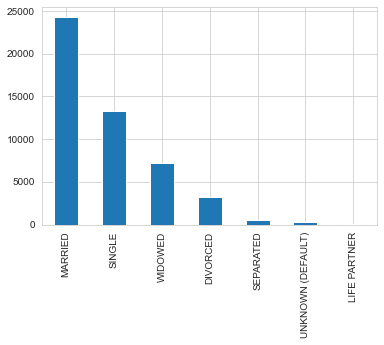

In [34]:
admissions_df['MARITAL_STATUS'].value_counts().plot(kind='bar')

Let's check for null values in the MARITAL_STATUS column.

In [36]:
admissions_df['MARITAL_STATUS'].isnull().sum()

10128

There are 10128 null values in the Marital Status column. These can easily be mapped to the UNKNOWN (DEFAULT) column.

In [38]:
admissions_df['MARITAL_STATUS'].unique()

array(['MARRIED', 'SINGLE', nan, 'DIVORCED', 'WIDOWED', 'SEPARATED',
       'UNKNOWN (DEFAULT)', 'LIFE PARTNER'], dtype=object)

In [41]:
admissions_df['MARITAL_STATUS'].fillna(value='UNKNOWN (DEFAULT)', inplace=True)

Let's take another look at the marital status column.

In [42]:
admissions_df['MARITAL_STATUS'].isnull().sum()

0

In [43]:
admissions_df['MARITAL_STATUS'].value_counts()

MARRIED              24239
SINGLE               13254
UNKNOWN (DEFAULT)    10473
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

<AxesSubplot:>

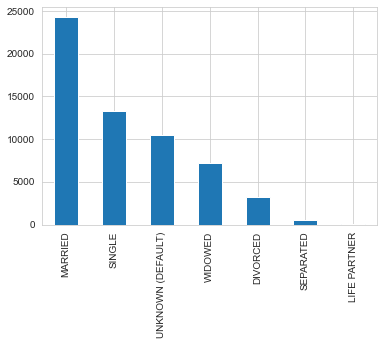

In [44]:
admissions_df['MARITAL_STATUS'].value_counts().plot(kind='bar')

Now we check if chart events are present for the given patient. Yes implies the presence of at least one chart event.

In [45]:
admissions_df['CHART EVENTS PRESENT'] = admissions_df['HAS_CHARTEVENTS_DATA'].map(lambda x: 'Yes' if x==1 else 'No')

([<matplotlib.patches.Wedge at 0x16d99d8b400>,
 [Text(-1.0960468961659864, 0.09317296498935494, 'YES'),
  Text(1.096046890713808, -0.09317302912642804, 'NO')])

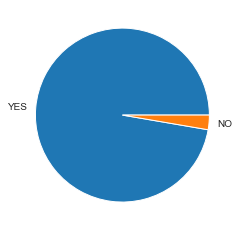

In [47]:
plt.pie(x = admissions_df['CHART EVENTS PRESENT'].value_counts(), labels='YES NO'.split())

In [49]:
admissions_df['INSURANCE'].value_counts()

Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: INSURANCE, dtype: int64

The INSURANCE column tells us more about the kind of insurance the patients have, if any. Let's check for null values.

In [51]:
admissions_df['INSURANCE'].isnull().sum()

0

There are no null values.

([<matplotlib.patches.Wedge at 0x16d9a07f880>,
 [Text(0.07453541396648924, 1.097471854793937, 'Medicare'),
  Text(-0.5307421779072102, -0.9634898757072184, 'Private'),
  Text(0.9300983622342922, -0.587296378814894, 'Medicaid'),
  Text(1.0859371551270807, -0.1753296755101734, 'Government'),
  Text(1.0994174197406033, -0.035795770293630354, 'Self Pay')])

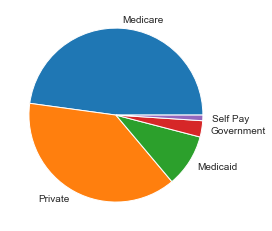

In [53]:
plt.pie(x = admissions_df['INSURANCE'].value_counts(), labels = ['Medicare', 'Private', 'Medicaid', 'Government', 'Self Pay'])

<AxesSubplot:>

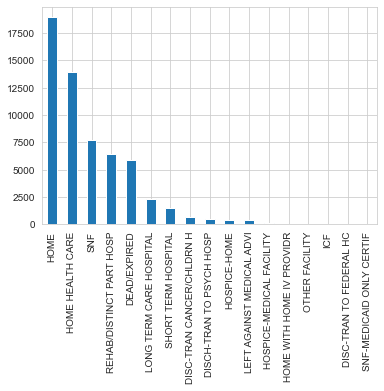

In [54]:
admissions_df['DISCHARGE_LOCATION'].value_counts().plot(kind='bar')

The DISCHARGE_LOCATION column tells us where the patients have been discharged to.

The ADMISSIONS table gave us insight regarding the various qualitative features of the patients such as religion, ethnicity, marital status, type of insurance and also about the admissions and discharges.